# Set 2 Round 2 of experiments
## Evaluating Inception behaviour features

In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib.image import imread 
import PIL
from PIL import Image
from sklearn import svm
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import h5py
from pickle import dump
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn.metrics import classification_report


In [2]:
training = sorted(glob.glob(r'data/all_features/mid-level/IV3- beh/*.csv'))
training_labels = pd.read_csv('data/MotionEmotion/reduced_beh_labelled_dataset.csv')
training_labels

,Unnamed: 0,path,label
0,0,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
1,1,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
2,2,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
3,3,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
4,4,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
...,...,...,...
4162,43778,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4163,43779,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4164,43780,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2
4165,43781,data/MotionEmotion/Motion_Emotion_Dataset/vide...,2


In [3]:
from natsort import natsorted 
#this works!
sorted_array = natsorted(training, key=lambda x:(x[29].isdigit(), x))

In [4]:
training_df = pd.DataFrame()
training_df['path'] = sorted_array
training_df['label'] = training_labels['label']
 

In [5]:
neutral = training_df[training_df['label'] == 5].sample(n=650)
neutral_ = training_df[training_df['label']== 5].index
training_df.drop(neutral_, inplace=True)
training_df

,path,label
56,data/all_features/mid-level/IV3- beh/data57.csv,4
57,data/all_features/mid-level/IV3- beh/data58.csv,4
58,data/all_features/mid-level/IV3- beh/data59.csv,4
59,data/all_features/mid-level/IV3- beh/data60.csv,4
60,data/all_features/mid-level/IV3- beh/data61.csv,4
...,...,...
4162,data/all_features/mid-level/IV3- beh/data4163.csv,2
4163,data/all_features/mid-level/IV3- beh/data4164.csv,2
4164,data/all_features/mid-level/IV3- beh/data4165.csv,2
4165,data/all_features/mid-level/IV3- beh/data4166.csv,2


In [6]:
train = pd.concat((training_df,neutral))
train_features = [ ]
train_labels = train.label
for i in train.path:    
    with open(i) as file_name:
        array = np.loadtxt(file_name, delimiter=",")
        train_features.append(array)
    #print(array)

In [7]:
'''
loading testing features
'''

'\nloading testing features\n'

In [8]:
testing_ = pd.read_csv('data/MotionEmotion/test_set_beh.csv')
testing_

,Unnamed: 0.1,Unnamed: 0,test_path,test_labels
0,11236,11236,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
1,3885,3885,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
2,11329,11329,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
3,1919,1919,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
4,11187,11187,data/MotionEmotion/Motion_Emotion_Dataset/vide...,1
...,...,...,...,...
995,13141,13141,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
996,31830,31830,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
997,10188,10188,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5
998,16226,16226,data/MotionEmotion/Motion_Emotion_Dataset/vide...,5


In [9]:
test_labels = testing_.test_labels 

In [24]:
testing_ = sorted(glob.glob(r'data/all_features/IV3_test_beh/*.csv'))

In [26]:
from natsort import natsorted 
#this works!
test_features = natsorted(testing_, key=lambda x:(x[29].isdigit(), x))
#sorted_array

In [28]:
testing = pd.DataFrame()
testing['path'] = test_features
testing['label'] = test_labels

In [29]:
test_features = [ ]
test_labels_ = testing.label
for i_ in testing.path:    
    with open(i_) as file_name_:
        array_ = np.loadtxt(file_name_, delimiter=",")
        test_features.append(array_)
    #print(array)

Accuracy Linear Kernel: 0.581
              precision    recall  f1-score   support

           1       0.82      0.69      0.75       200
           2       0.85      0.36      0.51       200
           3       0.95      0.41      0.58       200
           4       0.79      0.59      0.67       200
           5       0.33      0.84      0.48       200

    accuracy                           0.58      1000
   macro avg       0.75      0.58      0.60      1000
weighted avg       0.75      0.58      0.60      1000



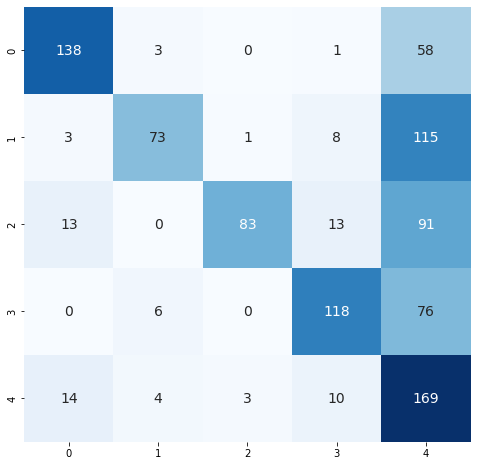

In [30]:
linear = svm.SVC(kernel='linear', decision_function_shape='ovo').fit(train_features, train_labels)
linear_pred = linear.predict(test_features)
accuracy_lin = linear.score(test_features, test_labels_)
import seaborn as sns
import matplotlib.pyplot as plt
cm_lin = confusion_matrix(test_labels_, linear_pred)
print('Accuracy Linear Kernel:', accuracy_lin)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
ax = sns.heatmap(cm_lin, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(test_labels_, linear_pred))


Accuracy Polynomial Kernel: 0.577
              precision    recall  f1-score   support

           1       0.83      0.69      0.75       200
           2       0.85      0.36      0.51       200
           3       0.95      0.41      0.57       200
           4       0.78      0.58      0.67       200
           5       0.33      0.85      0.48       200

    accuracy                           0.58      1000
   macro avg       0.75      0.58      0.59      1000
weighted avg       0.75      0.58      0.59      1000



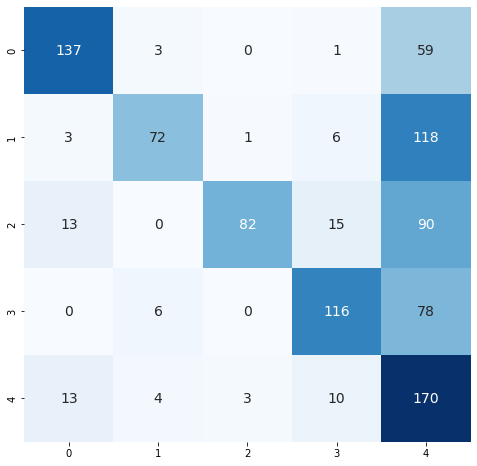

In [31]:
poly = svm.SVC(kernel='poly', degree=1, C=3, decision_function_shape='ovo').fit(train_features, train_labels)
poly_pred = poly.predict(test_features)
accuracy_poly = poly.score(test_features, test_labels_)
print('Accuracy Polynomial Kernel:', accuracy_poly)
fig, ax = plt.subplots(figsize=(8,8))         # Sample figsize in inches
cm_poly = confusion_matrix(test_labels_, poly_pred)
ax = sns.heatmap(cm_poly, annot=True, cmap='Blues',annot_kws={"size": 14}, fmt='g',cbar=False)
print(classification_report(test_labels_, poly_pred))
